In [27]:
# Core scverse libraries
import scanpy as sc
import anndata as ad

In [28]:
basal_path = "/mnt/shared/nationwide/brca/basal.h5ad"
mcc_path = "/mnt/shared/nationwide/brca/mcc.h5ad"

In [40]:
# both are cell x gene datasets
basal_data = sc.read_h5ad(basal_path)
basal_data.obs_names_make_unique()
mcc_data = sc.read_h5ad(mcc_path)
mcc_data.obs_names_make_unique()

# What the Data Looks Like

In [30]:
basal_data.var.head()

,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length
ENSMUSG00000051951,False,Xkr4,NCBITaxon:10090,gene,6094
ENSMUSG00000089699,True,Gm1992,NCBITaxon:10090,gene,250
ENSMUSG00000102343,False,Gm37381,NCBITaxon:10090,gene,1364
ENSMUSG00000025900,False,Rp1,NCBITaxon:10090,gene,12311
ENSMUSG00000025902,True,Sox17,NCBITaxon:10090,gene,4772


In [32]:
basal_data.obs.head()

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,clusters_resolution0.1,tricyclePosition,S_Score_UCell,G2M_Score_UCell,pseudo_cycling,assay_ontology_term_id,...,cluster_names,cell_type,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid
ACTTTGTGTACCTGTA-4_1,Ad1_agg_soupx,16040.970516,4370,6.678489,0,0.758632,0.0000,0.045808,NaN,EFO:0009922,...,Basal stem,tracheal epithelial cell,10x 3' v3,normal,Mus musculus,unknown,tracheal epithelial cell,na,mature stage,a3pgQHXhnN
ATGCATGAGGTCCAGA-4_1,Ad1_agg_soupx,17691.855279,4273,7.738218,0,0.735634,0.0000,0.038372,NaN,EFO:0009922,...,Basal stem,tracheal epithelial cell,10x 3' v3,normal,Mus musculus,unknown,tracheal epithelial cell,na,mature stage,p?3!9-9X^g
TCCAGAATCGAGATGG-2_1,Ad1_agg_soupx,29498.814882,5629,9.047998,0,0.084498,0.0000,0.055628,NaN,EFO:0009922,...,Basal stem,tracheal epithelial cell,10x 3' v3,normal,Mus musculus,unknown,tracheal epithelial cell,na,mature stage,19+J(i5C8`
GTAACCAAGACGAAGA-3_1,Ad1_agg_soupx,13798.422319,3926,8.300221,0,0.642403,0.0276,0.051256,NaN,EFO:0009922,...,Basal stem,tracheal epithelial cell,10x 3' v3,normal,Mus musculus,unknown,tracheal epithelial cell,na,mature stage,!eAd;;=5^A
CCGCAAGTCTCGAGTA-4_1,Ad1_agg_soupx,13068.181813,3888,6.621614,0,0.308792,0.0000,0.046321,NaN,EFO:0009922,...,Basal stem,tracheal epithelial cell,10x 3' v3,normal,Mus musculus,unknown,tracheal epithelial cell,na,mature stage,*F<d!A@q;|


In [33]:
mcc_data.var.head()

,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length
ENSMUSG00000051951,False,Xkr4,NCBITaxon:10090,gene,6094
ENSMUSG00000089699,True,Gm1992,NCBITaxon:10090,gene,250
ENSMUSG00000102343,False,Gm37381,NCBITaxon:10090,gene,1364
ENSMUSG00000025900,False,Rp1,NCBITaxon:10090,gene,12311
ENSMUSG00000025902,True,Sox17,NCBITaxon:10090,gene,4772


In [34]:
mcc_data.obs.head()

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,clusters_resolution0.1,tricyclePosition,S_Score_UCell,G2M_Score_UCell,pseudo_cycling,assay_ontology_term_id,...,cluster_names,cell_type,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid
ACTTTGTGTACCTGTA-4_1,Ad1_agg_soupx,16040.970516,4370,6.678489,0,0.758632,0.0000,0.045808,NaN,EFO:0009922,...,Basal stem,tracheal epithelial cell,10x 3' v3,normal,Mus musculus,unknown,tracheal epithelial cell,na,mature stage,a3pgQHXhnN
ATGCATGAGGTCCAGA-4_1,Ad1_agg_soupx,17691.855279,4273,7.738218,0,0.735634,0.0000,0.038372,NaN,EFO:0009922,...,Basal stem,tracheal epithelial cell,10x 3' v3,normal,Mus musculus,unknown,tracheal epithelial cell,na,mature stage,p?3!9-9X^g
TCCAGAATCGAGATGG-2_1,Ad1_agg_soupx,29498.814882,5629,9.047998,0,0.084498,0.0000,0.055628,NaN,EFO:0009922,...,Basal stem,tracheal epithelial cell,10x 3' v3,normal,Mus musculus,unknown,tracheal epithelial cell,na,mature stage,19+J(i5C8`
GTAACCAAGACGAAGA-3_1,Ad1_agg_soupx,13798.422319,3926,8.300221,0,0.642403,0.0276,0.051256,NaN,EFO:0009922,...,Basal stem,tracheal epithelial cell,10x 3' v3,normal,Mus musculus,unknown,tracheal epithelial cell,na,mature stage,!eAd;;=5^A
CCGCAAGTCTCGAGTA-4_1,Ad1_agg_soupx,13068.181813,3888,6.621614,0,0.308792,0.0000,0.046321,NaN,EFO:0009922,...,Basal stem,tracheal epithelial cell,10x 3' v3,normal,Mus musculus,unknown,tracheal epithelial cell,na,mature stage,*F<d!A@q;|


In [35]:
mcc_data.obs.columns

Index(['orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt',
       'clusters_resolution0.1', 'tricyclePosition', 'S_Score_UCell',
       'G2M_Score_UCell', 'pseudo_cycling', 'assay_ontology_term_id',
       'cell_type_ontology_term_id', 'development_stage_ontology_term_id',
       'disease_ontology_term_id', 'donor_id', 'is_primary_data',
       'organism_ontology_term_id', 'self_reported_ethnicity_ontology_term_id',
       'sex_ontology_term_id', 'suspension_type', 'tissue_type',
       'tissue_ontology_term_id', 'cluster_names', 'cell_type', 'assay',
       'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity',
       'development_stage', 'observation_joinid'],
      dtype='object')

# Data Vis / Exploration

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# sns.histplot(mcc_data.obs["n_counts_all"], label="mcc", hue=0.5)
# sns.histplot(basal_data.obs["n_counts_all"], label="basal")

# plt.xlabel("Cells")
# plt.xlim(left=0,right=75000)
# plt.legend()
# plt.show()

# Normalization

In [44]:
basal_data.obs["type"] = 1
mcc_data.obs["type"] = 2

In [45]:
adata = ad.concat([basal_data, mcc_data])
# recipes do the normalization steps for us
sc.pp.recipe_zheng17(adata)

/home/user/miniforge3/envs/scRNAseq/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/user/miniforge3/envs/scRNAseq/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/user/miniforge3/envs/scRNAseq/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/user/miniforge3/envs/scRNAseq/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/user/miniforge3/envs/scRNAseq/lib/python3.12/site-packages/anndata

# Integration

In [46]:
sc.pp.pca(adata)
adata.obsm['X_pca']

array([[-1.688505  ,  2.7883067 , -4.308205  , ...,  0.39360806,
        -1.3599043 , -0.21683101],
       [-1.5266258 ,  5.3226566 , -2.5586977 , ...,  0.35787526,
         0.1666703 , -0.6091944 ],
       [-1.9499117 ,  6.5031257 , -4.457953  , ...,  2.1187074 ,
         0.21099636, -1.6469868 ],
       ...,
       [-5.2925887 , -5.190127  ,  0.8920244 , ..., -1.1867732 ,
        -2.2729418 ,  0.55027276],
       [-3.740418  , -1.7652094 , -0.5058186 , ...,  0.01272957,
        -1.5656793 ,  2.5890086 ],
       [-0.7639829 , -1.1283021 ,  8.20362   , ..., -0.8477651 ,
         0.66918206,  0.07556987]], dtype=float32)

In [47]:
import scanpy.external as sce

sce.pp.scanorama_integrate(adata, 'type', verbose=1)

Processing datasets 1 <=> 2


In [48]:
sc.pp.neighbors(adata, use_rep="X_scanorama")
sc.tl.umap(adata)
sc.tl.leiden(
    adata, key_added="clusters", n_iterations=2, flavor="igraph", directed=False
)

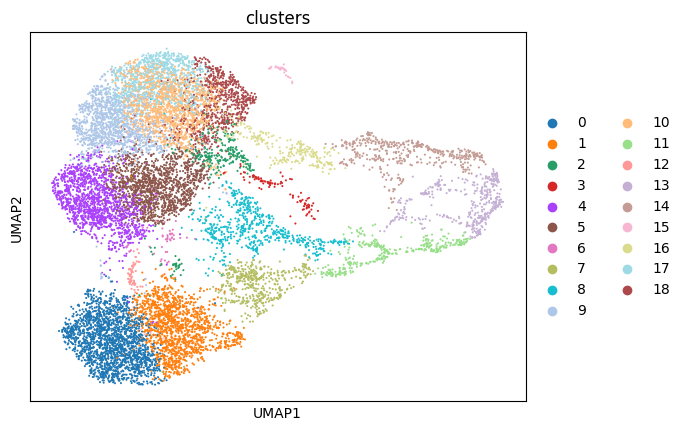

In [49]:
sc.pl.umap(
    adata, color=["clusters"], palette=sc.pl.palettes.default_20
)


# Metrics